In [1]:
import torch
import torch.nn as nn
import numpy as np

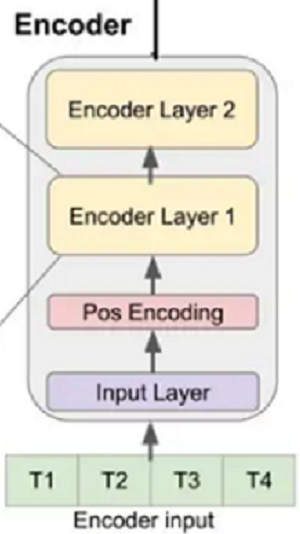

# Create the instance of Encoder layer

In [2]:
encoder_layer = nn.TransformerEncoderLayer(d_model = 256, nhead = 8)

In [3]:
encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
  )
  (linear1): Linear(in_features=256, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=256, bias=True)
  (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

# Create data

In [4]:
x = torch.randn(32, 256) # Batchsize x seqlen. seqlen must be equal to the embedded dimension of the transformer

# Get the output from the encoder layer

In [5]:
out_encoder_layer = encoder_layer(x)

In [6]:
out_encoder_layer.shape

torch.Size([32, 256])

# Create another input data

In [7]:
x1 = torch.randn(32, 1, 256) # batchsize x featuredim x seqlen

In [8]:
out_encoder_layer1 = encoder_layer(x1)

In [9]:
out_encoder_layer1.shape

torch.Size([32, 1, 256])

# Create another data

In [10]:
x2 = torch.rand(32, 1, 185)

In [12]:
x2 = nn.Linear(185, 256)(x2)

In [13]:
out_encoder_layer2 = encoder_layer(x2)

In [14]:
out_encoder_layer2.shape

torch.Size([32, 1, 256])

# Create the instance of transformer encoder

In [15]:
num_layers = 6

In [16]:
encoder = nn.TransformerEncoder(encoder_layer, num_layers)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [17]:
encoder

TransformerEncoder(
  (layers): ModuleList(
    (0-5): 6 x TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (linear1): Linear(in_features=256, out_features=2048, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=2048, out_features=256, bias=True)
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
)

# Get the output from the encoder

In [18]:
out_encoder = encoder(x)

In [19]:
out_encoder.shape

torch.Size([32, 256])